# Importing relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.dates as mdates
from datetime import datetime

# Getting dataset

In [2]:
wc_details=pd.read_csv(r"C:\Users\Welcome\Desktop\Projects\MLProjects\FIFA_World_Cup_Analysis\Data\WorldCups.csv")
wc_matches=pd.read_csv(r"C:\Users\Welcome\Desktop\Projects\MLProjects\FIFA_World_Cup_Analysis\Data\WorldCupMatches.csv")
wc_players=pd.read_csv(r"C:\Users\Welcome\Desktop\Projects\MLProjects\FIFA_World_Cup_Analysis\Data\WorldCupPlayers.csv")

In [3]:
wc_details.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [4]:
wc_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [5]:
wc_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


# Cleaning the dataset

In [6]:
print("World Cup details rows and columns ",wc_details.shape)
print("World Cup matches rows and columns ",wc_matches.shape)
print("World Cup players rows and columns ",wc_players.shape)

World Cup details rows and columns  (20, 10)
World Cup matches rows and columns  (4572, 20)
World Cup players rows and columns  (37784, 9)


In [7]:
wc_details=wc_details.drop_duplicates()
wc_matches=wc_matches.drop_duplicates()
wc_players=wc_players.drop_duplicates()

print("World Cup details rows and columns ",wc_details.shape)
print("World Cup matches rows and columns ",wc_matches.shape)
print("World Cup players rows and columns ",wc_players.shape)

World Cup details rows and columns  (20, 10)
World Cup matches rows and columns  (837, 20)
World Cup players rows and columns  (37048, 9)


## Major jump in row count of world cup matches dataset

The total number of FIFA World Cup matches from 1930 to 2014 varied over the years. Here’s a summary of how it evolved:

- **1930**: 13 teams, 18 matches
- **1934 and 1938**: 16 teams, knockout format, 17 matches each
- **1950**: 13 teams (different format), 22 matches
- **1954 to 1978**: 16 teams, typically 32 to 38 matches per tournament
- **1982 to 1994**: 24 teams, around 52 matches per tournament
- **1998 to 2014**: 32 teams, 64 matches per tournament

Using these numbers, we can estimate the total matches played from 1930 to 2014:

\[
18 + 17 + 17 + 22 + (6 x 32) + (2 x 38) + (4 x 52) + (5 x 64) = 836 matches
\]

So, there should be approximately **836 matches** in total from 1930 to 2014.

This is accurate to the **837 rows** in the World cup matches dataset after removing duplicates

In [8]:
wc_details.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [9]:
wc_matches.isnull().sum()

Year                    1
Datetime                1
Stage                   1
Stadium                 1
City                    1
Home Team Name          1
Home Team Goals         1
Away Team Goals         1
Away Team Name          1
Win conditions          1
Attendance              2
Half-time Home Goals    1
Half-time Away Goals    1
Referee                 1
Assistant 1             1
Assistant 2             1
RoundID                 1
MatchID                 1
Home Team Initials      1
Away Team Initials      1
dtype: int64

In [10]:
wc_players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33030
Event            28225
dtype: int64

We see that there are no null values in World cup details dataset and mostly no null values in World cup players dataset accept the Position and Event rows which are allowed to have null values.

We drop null values from the World cup matches dataset.

In [11]:
wc_matches=wc_matches.dropna()
wc_matches.shape

(835, 20)

In [12]:
wc_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [13]:
wc_matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 835
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  835 non-null    float64
 1   Datetime              835 non-null    object 
 2   Stage                 835 non-null    object 
 3   Stadium               835 non-null    object 
 4   City                  835 non-null    object 
 5   Home Team Name        835 non-null    object 
 6   Home Team Goals       835 non-null    float64
 7   Away Team Goals       835 non-null    float64
 8   Away Team Name        835 non-null    object 
 9   Win conditions        835 non-null    object 
 10  Attendance            835 non-null    float64
 11  Half-time Home Goals  835 non-null    float64
 12  Half-time Away Goals  835 non-null    float64
 13  Referee               835 non-null    object 
 14  Assistant 1           835 non-null    object 
 15  Assistant 2           835 no

In [14]:
wc_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37048 entries, 0 to 37047
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37048 non-null  int64 
 1   MatchID        37048 non-null  int64 
 2   Team Initials  37048 non-null  object
 3   Coach Name     37048 non-null  object
 4   Line-up        37048 non-null  object
 5   Shirt Number   37048 non-null  int64 
 6   Player Name    37048 non-null  object
 7   Position       4018 non-null   object
 8   Event          8823 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


## Changing the datatypes for easy reference

In [15]:
wc_details['Attendance'] = wc_details['Attendance'].astype(str)

wc_details['Attendance'] = wc_details['Attendance'].str.replace('.', '', regex=False) 
wc_details['Attendance'] = wc_details['Attendance'].str.replace(',', '', regex=False)


print("NaN values in Attendance before conversion:", wc_details['Attendance'].isna().sum())

wc_details['Attendance'].fillna(0, inplace=True)

wc_details['Attendance'] = wc_details['Attendance'].astype(int)

print("Attendance dtype after conversion:", wc_details['Attendance'].dtype)


NaN values in Attendance before conversion: 0
Attendance dtype after conversion: int64


In [16]:

wc_matches['Year'] = wc_matches['Year'].astype(str)
wc_matches['Year'] = wc_matches['Year'].str.replace('.', '', regex=False)
wc_matches['Year'] = wc_matches['Year'].str.replace(',', '', regex=False)
wc_matches['Year'] = wc_matches['Year'].astype(int)


wc_details['Year'] = wc_details['Year'].astype(str)
wc_details['Year'] = wc_details['Year'].str.replace('.', '', regex=False)
wc_details['Year'] = wc_details['Year'].str.replace(',', '', regex=False)
wc_details['Year'] = wc_details['Year'].astype(int)
wc_details['Year'].dtype

dtype('int64')

In [17]:
# Convert the 'Winner' column to the dedicated Pandas StringDtype
wc_details['Winner'] = wc_details['Winner'].astype("string")

# Check the result
wc_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     string
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int64 
dtypes: int64(5), object(4), string(1)
memory usage: 1.7+ KB


## Some columns have repeated values with slight variation so we are changing them

In [18]:
mapping={"Germany FR": "Germany"}
wc_details["Winner"]=wc_details["Winner"].replace(mapping)
wc_details["Runners-Up"]=wc_details["Runners-Up"].replace(mapping)
wc_details["Third"]=wc_details["Third"].replace(mapping)
wc_details["Fourth"]=wc_details["Fourth"].replace(mapping)

wc_matches["Home Team Name"]=wc_matches["Home Team Name"].replace(mapping)
wc_matches["Away Team Name"]=wc_matches["Away Team Name"].replace(mapping)

In [19]:
group_mapping={
    "Group 1":"Group A",
    "Group 2":"Group B",
    "Group 3":"Group C",
    "Group 4":"Group D",
    "Group 5":"Group E",
    "Group 6":"Group F",
    "First round":"Group A",
    "Third place":"Match for third place",
    "Play-off for third place":"Match for third place"
}


wc_matches["Stage"] = wc_matches["Stage"].replace(group_mapping)

In [20]:
wc_matches['Datetime'] = pd.to_datetime(wc_matches['Datetime'], errors='coerce')
wc_matches['Year'] = wc_matches['Datetime'].dt.year
wc_matches = wc_matches.dropna(subset=['Year'])

# The Analysis

## Looking at goals scored at home vs goals scored away from home

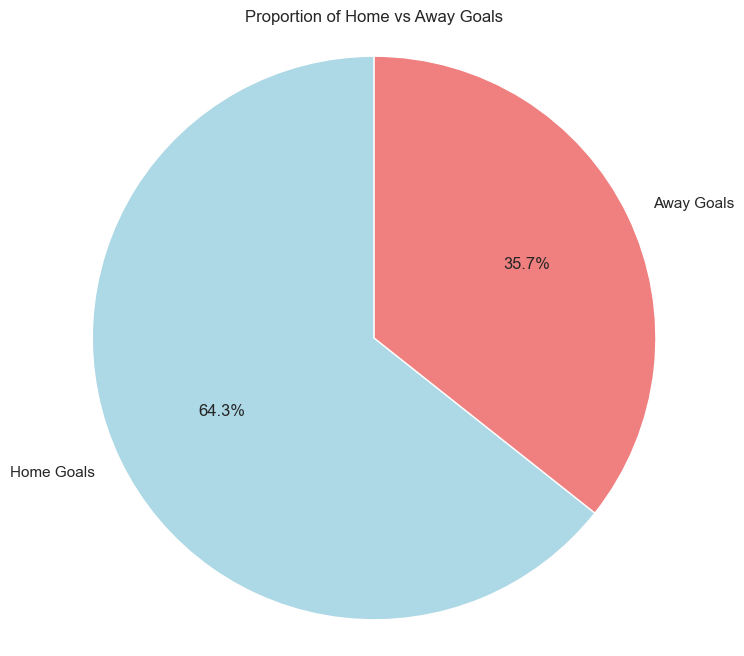

In [21]:
home_goals = wc_matches['Home Team Goals'].sum()
away_goals = wc_matches['Away Team Goals'].sum()
    
labels = ['Home Goals', 'Away Goals']
sizes = [home_goals, away_goals]
colors = ['lightblue', 'lightcoral']
    
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Home vs Away Goals')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

## The number of goals scored overtime

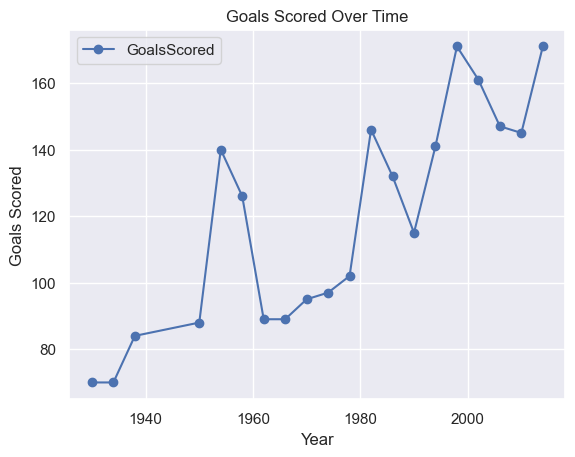

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
goal_trends = wc_details[['Year', 'GoalsScored']].groupby('Year').sum()
goal_trends.plot(kind='line', title="Goals Scored Over Time", ylabel="Goals Scored", xlabel="Year", marker='o')
plt.show()

## Goals scored based on the stage

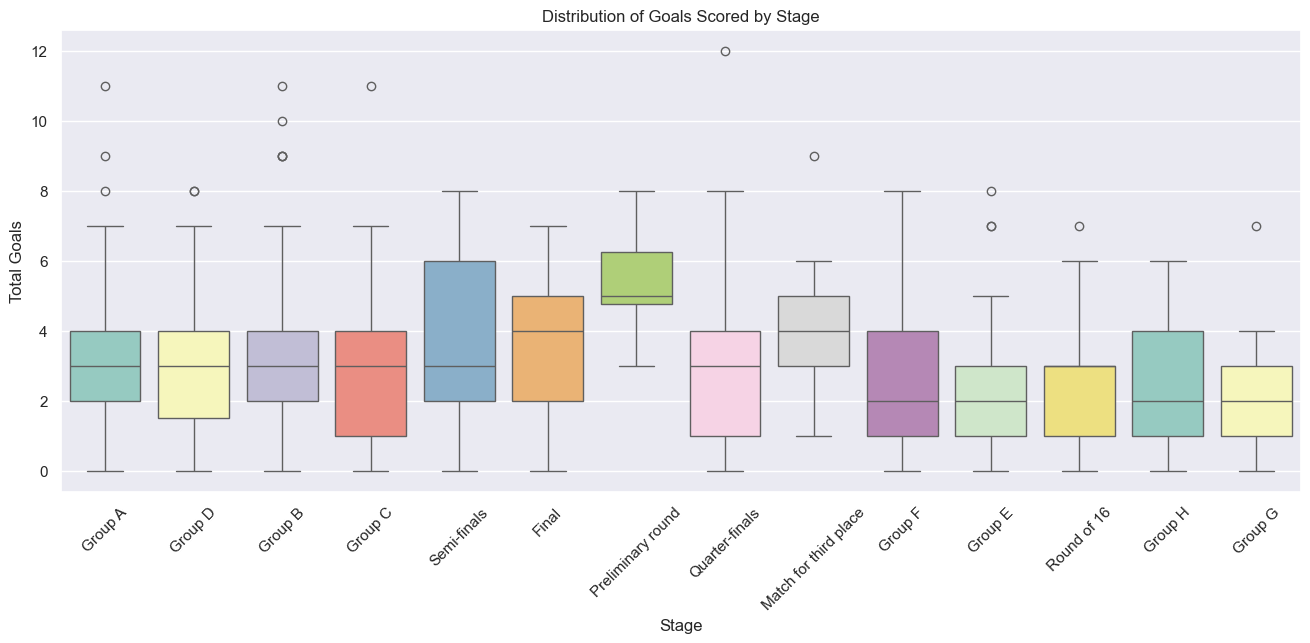

In [23]:
wc_matches['Total Goals'] = wc_matches['Home Team Goals'] + wc_matches['Away Team Goals']
plt.figure(figsize=(16, 6))
sns.boxplot(x='Stage', y='Total Goals', data=wc_matches, palette='Set3')
plt.title('Distribution of Goals Scored by Stage')
plt.xlabel('Stage')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.show()

## Top teams based on the goals they have scored

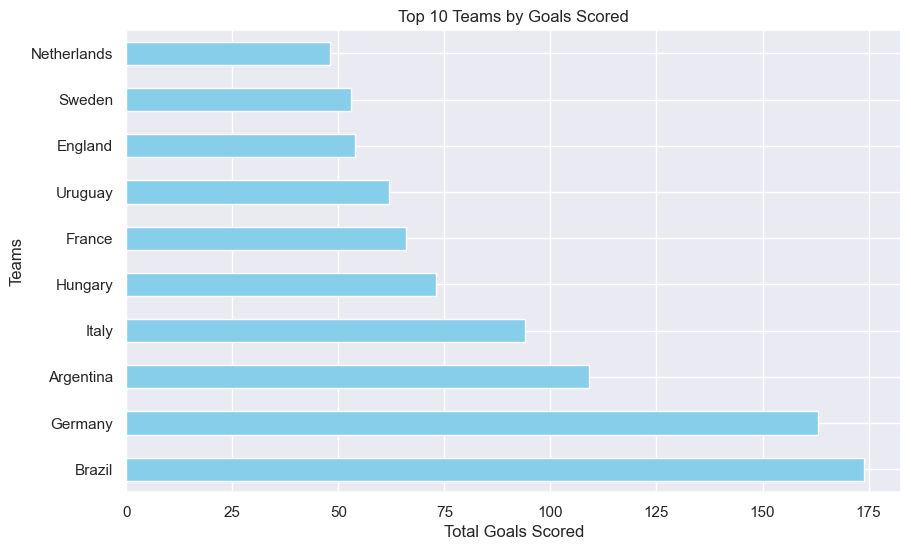

In [24]:
top_teams = wc_matches.groupby('Home Team Name')['Home Team Goals'].sum().nlargest(10)
    
plt.figure(figsize=(10, 6))
top_teams.plot(kind='barh', color='skyblue')
plt.title('Top 10 Teams by Goals Scored')
plt.xlabel('Total Goals Scored')
plt.ylabel('Teams')
plt.show()

## Teams with most worldcup wins in the dataset

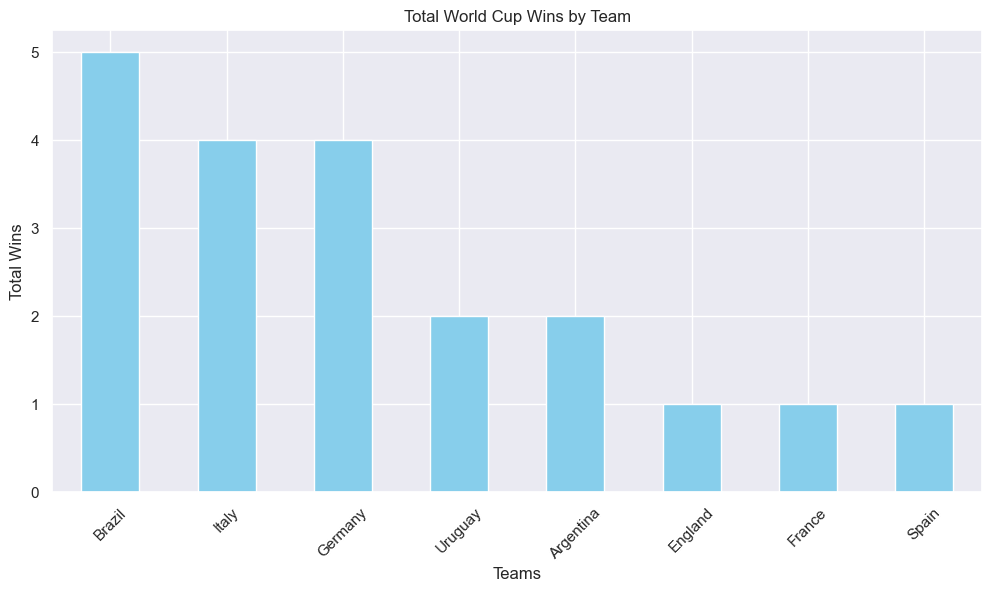

In [25]:
winners_count = wc_details['Winner'].value_counts()
plt.figure(figsize=(12, 6))
winners_count.plot(kind='bar', color='skyblue')
plt.title('Total World Cup Wins by Team')
plt.xlabel('Teams')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()

## Attendance by year

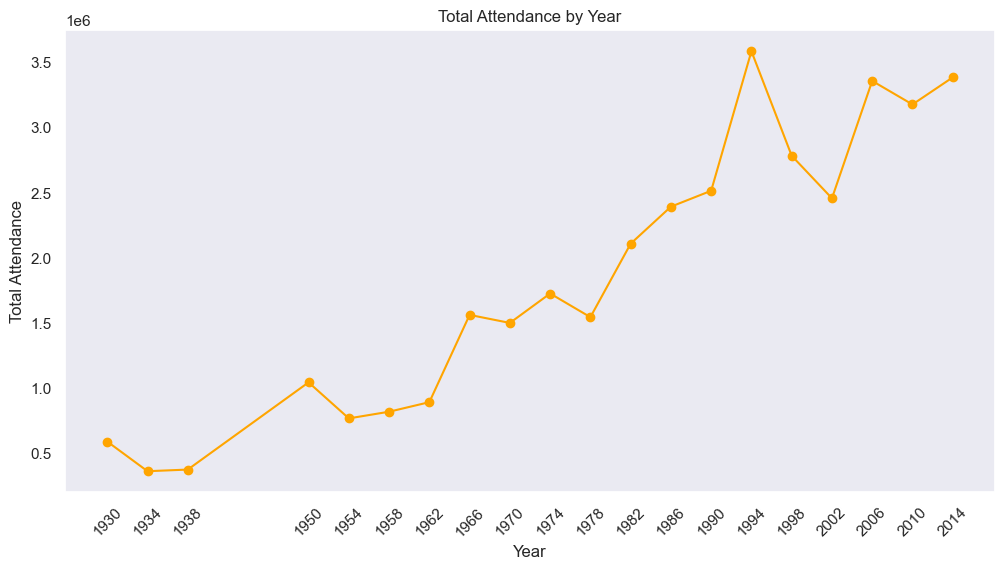

In [26]:
attendance_by_year = wc_matches.groupby('Year')['Attendance'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(attendance_by_year['Year'], attendance_by_year['Attendance'], marker='o', color='orange')
plt.title('Total Attendance by Year')
plt.xlabel('Year')
plt.ylabel('Total Attendance')
plt.xticks(attendance_by_year['Year'], rotation=45)
plt.grid()
plt.show()

## Goals by top 10 teams till 2014

In [27]:
summary_stats = wc_matches.groupby('Home Team Name').agg({
    'Home Team Goals': 'sum',
    'Away Team Goals': 'sum',
    'Attendance': 'mean'
}).rename(columns={
    'Home Team Goals': 'Total Home Goals',
    'Away Team Goals': 'Total Away Goals'
})
    
summary_stats['Total Goals'] = summary_stats['Total Home Goals'] + summary_stats['Total Away Goals']
summary_stats = summary_stats.sort_values(by='Total Goals', ascending=False).head(10)
    
display(summary_stats)

,Total Home Goals,Total Away Goals,Attendance,Total Goals
Home Team Name,,,,
Brazil,174.0,65.0,55349.298701,239.0
Germany,163.0,66.0,49137.540541,229.0
Argentina,109.0,44.0,53523.480769,153.0
Italy,94.0,36.0,47754.290909,130.0
France,66.0,30.0,39857.551724,96.0
Hungary,73.0,19.0,22372.444444,92.0
Uruguay,62.0,29.0,47569.750000,91.0
Sweden,53.0,25.0,37615.037037,78.0
Spain,47.0,29.0,43547.655172,76.0


## Top attended matches details

In [28]:
def top_attendance_matches(n=10):
    # Get the top N matches with the highest attendance
    top_matches = wc_matches.nlargest(n, 'Attendance')
    return top_matches[['Year', 'Stage', 'Home Team Name', 'Away Team Name', 'Attendance', 'Home Team Goals', 'Away Team Goals', 'MatchID']]

top_attendance_df = top_attendance_matches()
top_attendance_df.head(10)

,Year,Stage,Home Team Name,Away Team Name,Attendance,Home Team Goals,Away Team Goals,MatchID
74,1950.0,Group F,Uruguay,Brazil,173850.0,2.0,1.0,1190.0
71,1950.0,Group F,Brazil,Spain,152772.0,6.0,1.0,1186.0
63,1950.0,Group A,Brazil,Yugoslavia,142429.0,2.0,0.0,1191.0
70,1950.0,Group F,Brazil,Sweden,138886.0,7.0,1.0,1189.0
379,1986.0,Group B,Mexico,Paraguay,114600.0,1.0,1.0,680.0
411,1986.0,Final,Argentina,Germany,114600.0,3.0,2.0,393.0
397,1986.0,Round of 16,Mexico,Bulgaria,114580.0,2.0,0.0,463.0
407,1986.0,Quarter-finals,Argentina,England,114580.0,2.0,1.0,392.0
409,1986.0,Semi-finals,Argentina,Belgium,114500.0,2.0,0.0,388.0
367,1986.0,Group B,Belgium,Mexico,110000.0,1.0,2.0,428.0


In [29]:
def analyze_top_attendance_teams(top_matches):
    # Calculate total goals scored by teams in high-attendance matches
    team_performance = wc_matches[(wc_matches['MatchID'].isin(top_matches['MatchID']))].groupby('Home Team Name').agg({
        'Home Team Goals': 'sum',
        'Attendance': 'mean'  # Average attendance for the team in high-attendance matches
    }).reset_index()

    team_performance['Total Goals'] = team_performance['Home Team Goals']
    
    # Including away goals for completeness
    away_performance = wc_matches[(wc_matches['MatchID'].isin(top_matches['MatchID']))].groupby('Away Team Name').agg({
        'Away Team Goals': 'sum',
        'Attendance': 'mean'  # Average attendance for the team in high-attendance matches
    }).reset_index()
    
    away_performance.rename(columns={'Away Team Goals': 'Total Goals'}, inplace=True)
    
    # Combine home and away performance
    performance_combined = pd.concat([team_performance, away_performance.rename(columns={'Away Team Name': 'Home Team Name'})])
    performance_summary = performance_combined.groupby('Home Team Name').agg({'Total Goals': 'sum', 'Attendance': 'mean'}).reset_index()

    return performance_summary

team_performance_summary = analyze_top_attendance_teams(top_attendance_df)


## Goals by teams in high attendance matches and Average attendance by team for high attendance matches

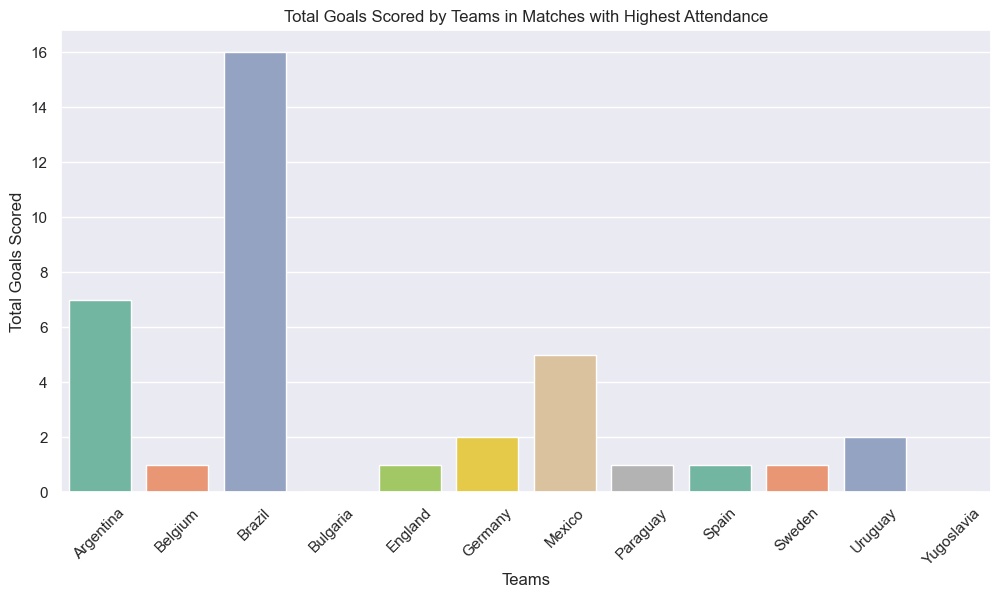

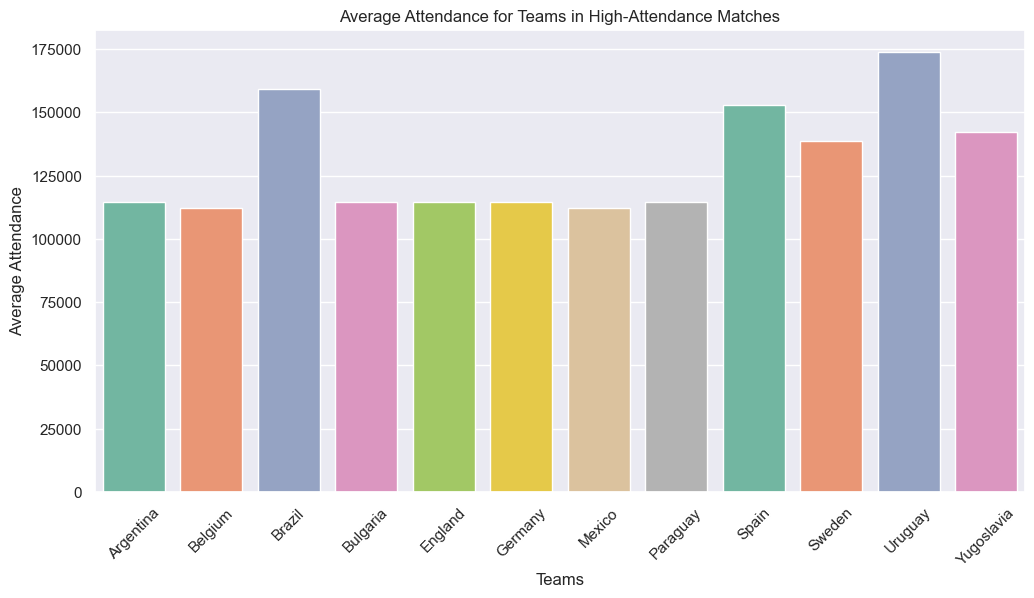

In [30]:
def plot_goals_vs_attendance(team_performance_summary):
    plt.figure(figsize=(12, 6))
    
    # Bar plot for Total Goals scored by teams in high-attendance matches
    sns.barplot(data=team_performance_summary, x='Home Team Name', y='Total Goals', palette='Set2')
    plt.title('Total Goals Scored by Teams in Matches with Highest Attendance')
    plt.xlabel('Teams')
    plt.ylabel('Total Goals Scored')
    plt.xticks(rotation=45)
    plt.show()
    
    # Plotting average attendance by team
    plt.figure(figsize=(12, 6))
    sns.barplot(data=team_performance_summary, x='Home Team Name', y='Attendance', palette='Set2')
    plt.title('Average Attendance for Teams in High-Attendance Matches')
    plt.xlabel('Teams')
    plt.ylabel('Average Attendance')
    plt.xticks(rotation=45)
    plt.show()

plot_goals_vs_attendance(team_performance_summary)


## Top Coaches by goals scored by their respective players

In [31]:
def top_10_coaches_with_most_goals(wc_players):
    # Group by Player Name and Coach Name, summing their goals (assuming you have a 'Goals Scored' metric)
    player_goals = wc_players.groupby(['Player Name', 'Coach Name']).agg({
        'Shirt Number': 'count'  # Replace with actual goals scored if available
    }).reset_index()

    # Rename the aggregated column to represent goals
    player_goals.rename(columns={'Shirt Number': 'Goals Scored'}, inplace=True)
    
    # Sort by Goals Scored in descending order and get the top 10
    top_players = player_goals.sort_values(by='Goals Scored', ascending=False).head(10)

    return top_players

# Call the function
top_10_coaches_info = top_10_coaches_with_most_goals(wc_players)

# Display the results
top_10_coaches_info


,Player Name,Coach Name,Goals Scored
7909,Sepp MAIER,SCHOEN Helmut (FRG),25
3594,Horst-Dieter HOETTGES,SCHOEN Helmut (FRG),19
4618,Juergen GRABOWSKI,SCHOEN Helmut (FRG),19
2752,Franz BECKENBAUER,SCHOEN Helmut (FRG),19
8861,Wolfgang OVERATH,SCHOEN Helmut (FRG),19
1137,Berti VOGTS,SCHOEN Helmut (FRG),19
709,Antonio CABRINI,BEARZOT Enzo (ITA),18
6754,Paolo ROSSI,BEARZOT Enzo (ITA),18
5823,Marco TARDELLI,BEARZOT Enzo (ITA),18
2976,Gaetano SCIREA,BEARZOT Enzo (ITA),18


## Top coaches by number of goals scored by players under them

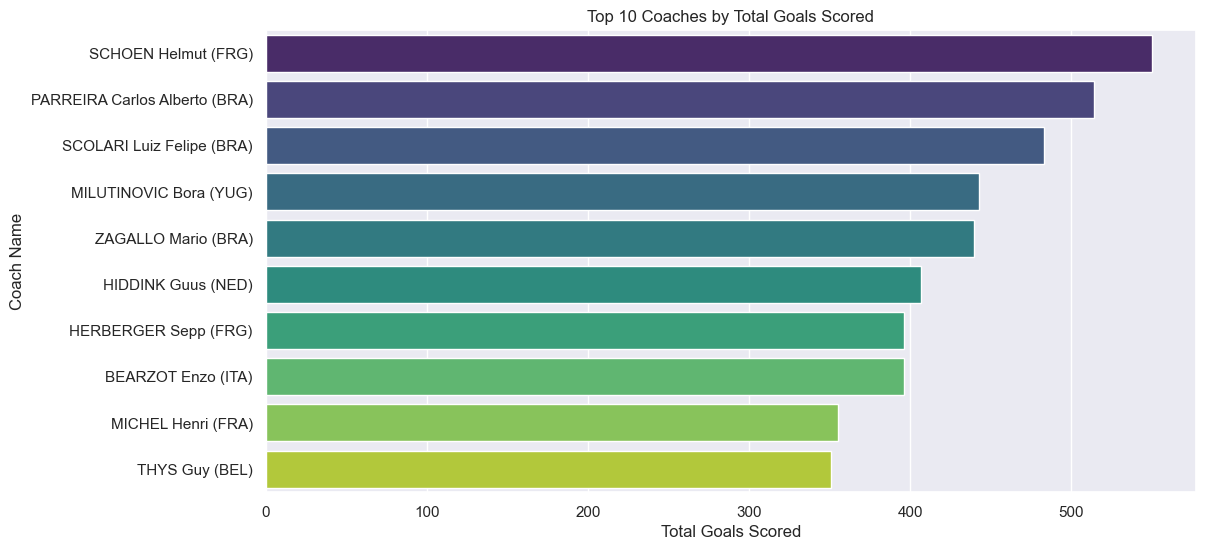

In [32]:
def top_coaches_over_multiple_wc(wc_players):
    # Aggregate goals scored by each coach across all World Cups
    player_goals = wc_players.groupby(['Coach Name']).agg({
        'Shirt Number': 'count'  # Replace with actual goals scored if available
    }).reset_index()
    
    player_goals.rename(columns={'Shirt Number': 'Total Goals'}, inplace=True)
    
    # Sort by total goals and select top coaches
    top_coaches = player_goals.sort_values(by='Total Goals', ascending=False).head(10)

    # Plot the results
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_coaches, x='Total Goals', y='Coach Name', palette='viridis')
    plt.title('Top 10 Coaches by Total Goals Scored')
    plt.xlabel('Total Goals Scored')
    plt.ylabel('Coach Name')
    plt.show()

# Call the function
top_coaches_over_multiple_wc(wc_players)

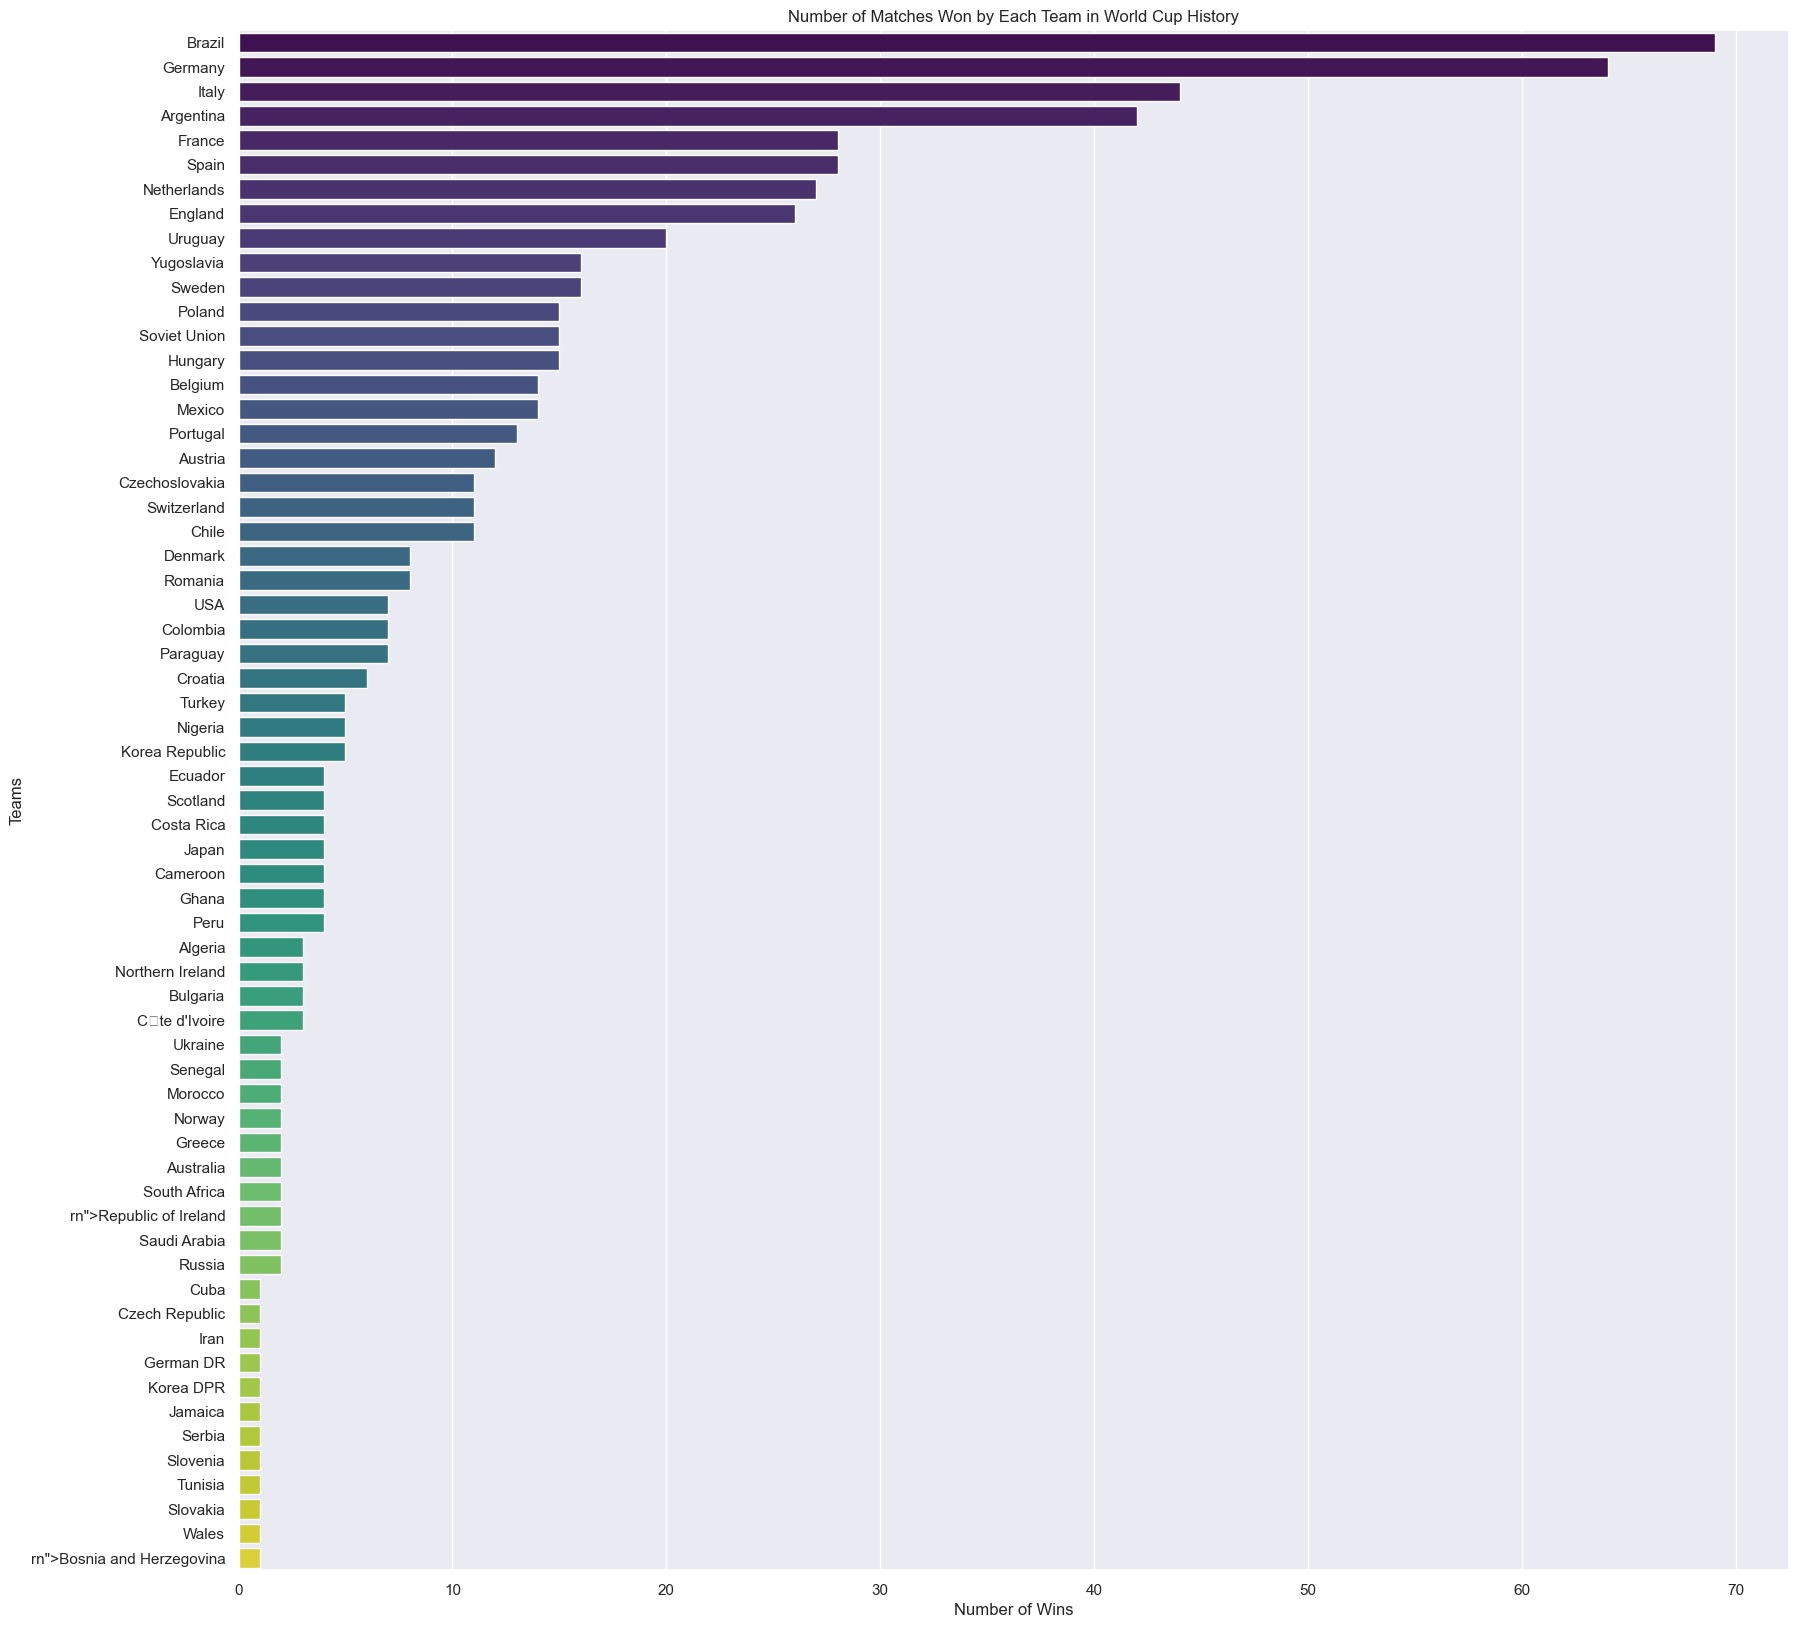

In [33]:
team_wins = pd.DataFrame()

# Count wins for home teams
home_wins = wc_matches[wc_matches['Home Team Goals'] > wc_matches['Away Team Goals']]
home_wins_count = home_wins['Home Team Name'].value_counts().reset_index()
home_wins_count.columns = ['Team', 'Wins']

# Count wins for away teams
away_wins = wc_matches[wc_matches['Away Team Goals'] > wc_matches['Home Team Goals']]
away_wins_count = away_wins['Away Team Name'].value_counts().reset_index()
away_wins_count.columns = ['Team', 'Wins']

# Merge home and away wins
team_wins = pd.concat([home_wins_count, away_wins_count]).groupby('Team').sum().reset_index()

# Step 2: Prepare data for plotting
team_wins.sort_values(by='Wins', ascending=False, inplace=True)

# Step 3: Visualization
plt.figure(figsize=(20, 20))
sns.barplot(data=team_wins, x='Wins', y='Team', palette='viridis')
plt.title('Number of Matches Won by Each Team in World Cup History')
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.show()


## Performance of top three teams over the world cups

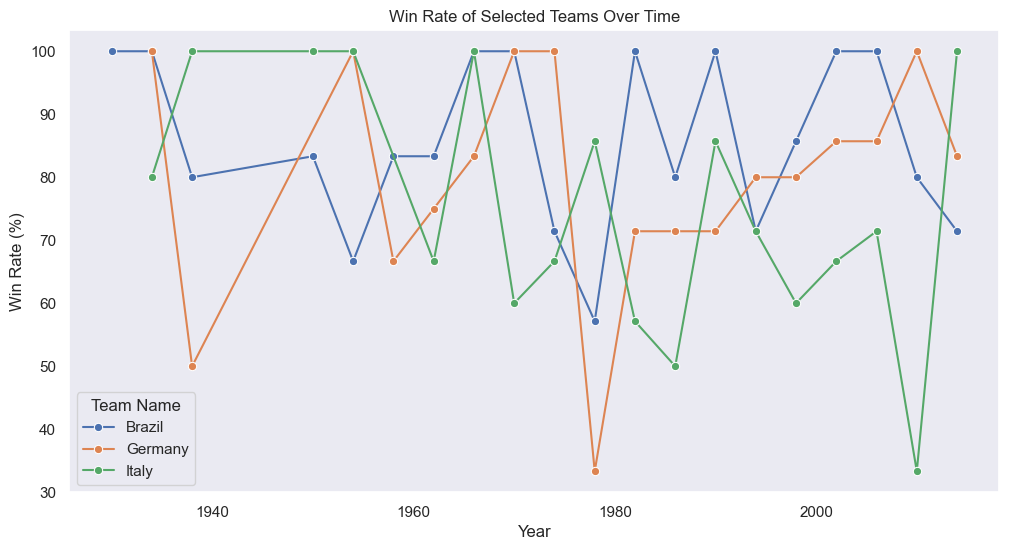

In [34]:
def win_rate_over_time(wc_matches):
    wins = wc_matches[(wc_matches['Home Team Goals'] > wc_matches['Away Team Goals']) | 
                      (wc_matches['Home Team Goals'] < wc_matches['Away Team Goals'])]

    home_wins = wins.groupby(['Year', 'Home Team Name']).size().reset_index(name='Wins')
    away_wins = wins.groupby(['Year', 'Away Team Name']).size().reset_index(name='Wins')
    away_wins.rename(columns={'Away Team Name': 'Home Team Name'}, inplace=True)
    total_wins = pd.concat([home_wins, away_wins]).groupby(['Year', 'Home Team Name']).sum().reset_index()

    total_matches = wc_matches.groupby(['Year']).size().reset_index(name='Total Matches')
    total_matches_by_team = wc_matches.groupby(['Year', 'Home Team Name']).size().reset_index(name='Total Matches')
    total_matches_by_team = pd.concat([total_matches_by_team, 
                                        wc_matches.groupby(['Year', 'Away Team Name']).size().reset_index(name='Total Matches').rename(columns={'Away Team Name': 'Home Team Name'})])

    total_matches_combined = total_matches_by_team.groupby(['Year', 'Home Team Name']).sum().reset_index()


    win_rates = pd.merge(total_wins, total_matches_combined, on=['Year', 'Home Team Name'], how='outer')
    win_rates['Win Rate'] = win_rates['Wins'] / win_rates['Total Matches'] * 100

    top_teams = ['Brazil','Italy', 'Germany']
    win_rates_filtered = win_rates[win_rates['Home Team Name'].isin(top_teams)]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=win_rates_filtered, x='Year', y='Win Rate', hue='Home Team Name', marker='o')
    plt.title('Win Rate of Selected Teams Over Time')
    plt.xlabel('Year')
    plt.ylabel('Win Rate (%)')
    plt.grid()
    plt.legend(title='Team Name')
    plt.show()

win_rate_over_time(wc_matches)


## Matches won by team who won the cup for the year

In [35]:
winners_match_wins = []

winy = list(wc_details['Year'])
wint = list(wc_details['Winner'].str.strip())

for i in range(len(winy)):
    year = winy[i]
    winner = wint[i]

    temp_matches_df = wc_matches[wc_matches['Year'] == year]

    home_matches = temp_matches_df[temp_matches_df['Home Team Name'] == winner]
    away_matches = temp_matches_df[temp_matches_df['Away Team Name'] == winner]

    home_wins = len(home_matches[home_matches['Home Team Goals'] > home_matches['Away Team Goals']])
    away_wins = len(away_matches[away_matches['Away Team Goals'] > away_matches['Home Team Goals']])
    
    total_wins = home_wins + away_wins

    winners_match_wins.append({'Year': year, 'Winner': winner, 'Matches Won': total_wins})

winners_match_wins_df = pd.DataFrame(winners_match_wins)

winners_match_wins_df['Year'] = winners_match_wins_df['Year'].astype(int)
winners_match_wins_df['Matches Won'] = winners_match_wins_df['Matches Won'].astype(int)

winners_match_wins_df


,Year,Winner,Matches Won
0,1930,Uruguay,4
1,1934,Italy,4
2,1938,Italy,4
3,1950,Uruguay,3
4,1954,Germany,5
5,1958,Brazil,5
6,1962,Brazil,5
7,1966,England,5
8,1970,Brazil,6
9,1974,Germany,5


## Comparison of goals over years

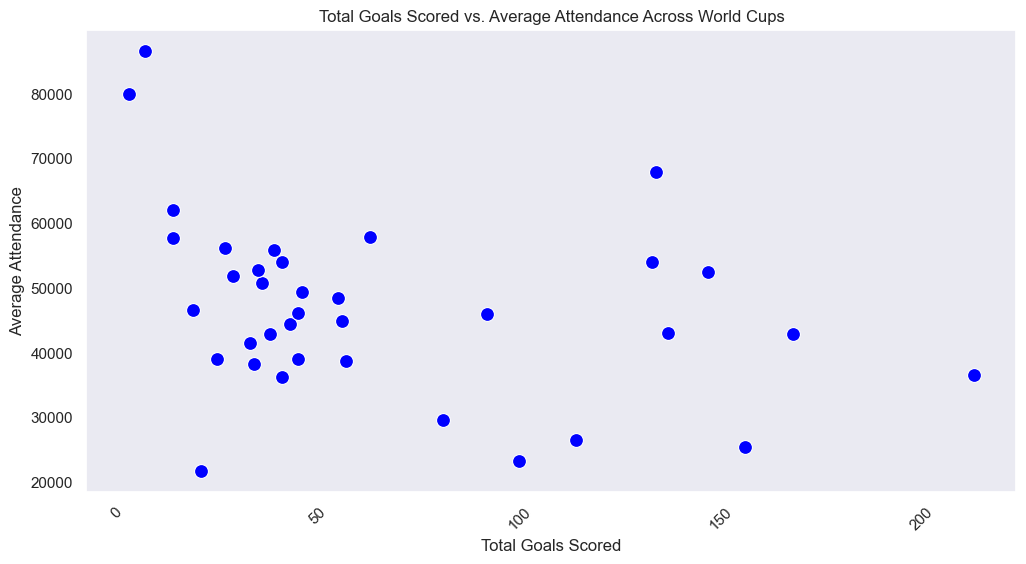

In [36]:
def goals_vs_attendance_across_years(wc_matches):
    # Extract year and relevant match data
    wc_matches['Year'] = wc_matches['MatchID'].apply(lambda x: x // 100)  # Assuming MatchID structure
    total_goals = wc_matches.groupby(['Year']).agg({
        'Home Team Goals': 'sum',
        'Away Team Goals': 'sum',
        'Attendance': 'mean'  # Average attendance per year
    }).reset_index()
    
    # Calculate total goals
    total_goals['Total Goals'] = total_goals['Home Team Goals'] + total_goals['Away Team Goals']

    # Plot the results
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Total Goals', y='Attendance', data=total_goals, color='blue', s=100)
    plt.title('Total Goals Scored vs. Average Attendance Across World Cups')
    plt.xlabel('Total Goals Scored')
    plt.ylabel('Average Attendance')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Call the function
goals_vs_attendance_across_years(wc_matches)